In [2]:
import psycopg2 as pg2
import pandas as pd
import math

In [9]:
print ("Connecting to SQL")
conn = pg2.connect(user='postgres',  dbname='penny', host='localhost', port='5432', password='')

print ("Reading Dataset")
df = pd.read_sql ("Select * from auction_full ", conn)

Connecting to SQL
Reading Dataset


In [10]:
df.perc_to_bin[(df.perc_to_bin > .1 ) & (df.perc_to_bin < 1)&(df.giveup)].hist(bins=20)

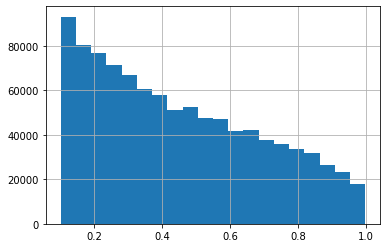

In [11]:
df.perc_to_bin[(df.perc_to_bin > .1 ) & (df.perc_to_bin < 1)&(df.giveup==False)].hist(bins=20)


In [12]:
df["bucket"]=df.perc_to_bin.apply(lambda x: int(round(int(x*300))/30.0))

/home/pkgalea/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


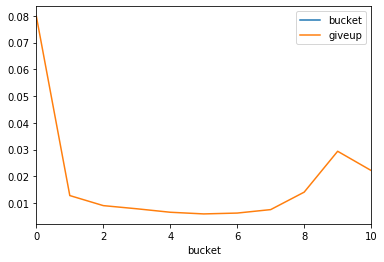

In [13]:
df.groupby("bucket").mean().loc[:,["bucket", "giveup"]].head(11).plot()

In [14]:
df.groupby("bucket").mean().loc[:,["perc_to_bin", "giveup"]].head(11)

,perc_to_bin,giveup
bucket,,
0,0.043888,0.079815
1,0.146587,0.012848
2,0.246529,0.009094
3,0.346163,0.007915
4,0.446733,0.006616
5,0.547500,0.005994
6,0.647057,0.006311
7,0.746305,0.007604
8,0.845803,0.014124


In [15]:
conn.close()